## BTC の ローソク足チャート

matplotlib.finance ではローソク足チャートを描画できる。

以下の例では、[Yahoo! Finance から取得したビットコイン-USD 交換レートデータ](https://finance.yahoo.com/quote/BTC-USD/history/)の毎日の始値をプロットしている:

(736634.0, 736754.0)

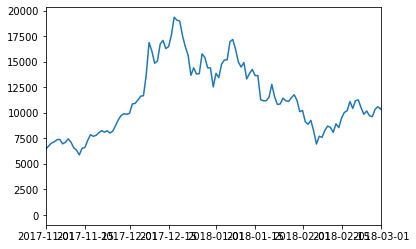

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime

from matplotlib.dates import date2num

import pandas as pd
import datetime

fig, ax = plt.subplots(1,1)

df = pd.read_csv("BTC-USD.csv", index_col = 0, parse_dates=True)
ax.plot(df["Open"])
#ax.plot(df["Close"])

ax.set_xlim([datetime.date(2017, 11,1), datetime.date(2018, 3,1)])

以下の例では、ローソク足チャートを描画している。`ohlc` は `[日付,始値,高値,低値,終値]` を要素に持つリスト:

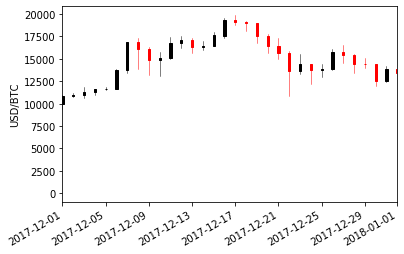

In [57]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
from matplotlib.dates import date2num

import pandas as pd
import datetime

fig = plt.figure()
ax = plt.subplot(1,1, 1)

df = pd.read_csv("BTC-USD.csv", index_col = 0, parse_dates=True)
ohlc = [(date2num(x.date()), val["Open"], val["High"], val["Low"], val["Close"]) for x, val in df.iterrows()]
candlestick_ohlc(ax, ohlc)

ax.set_xlim([datetime.date(2017, 12, 1), datetime.date(2018, 1, 1)])
fig.autofmt_xdate()
ax.set_ylabel("USD/BTC")
plt.show()